# Final Project
- Katie Chen
- Zachary Francis

## Problem Statement
Denver's Open Data Catalogue keeps an open record of traffic accidents from the past few years in their [Open Data Catalogue](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents).  This data set can be used to possibly answer several inquiries:
- Are traffic accidents in Denver on an upward or downward trend?
- Are serious injuries or fatalites changing in any significant way?
- Are fatalaties or injuries more likely when a certain type of vehicle is at fault? Is the struck vehicle?

Other questions may arrise in exploratory data analysis.  This data set is only for traffic accidents in Denver.  It may be combined or compared against similar data sets for other major cities to characterize vehicle safetly in Denver against similar metropolitan areas.

The data set can be accessed by downloading a CSV or calling against the REST API.  Ultimately it is a large file of comma separated values, with 48 columnns.  Not all the columns will be of use - there is especially a lot of location/spatial data that will probably not be prudent to the goals of this data analysis.  The CSV file has been downloaded and is included in the git repository of this notebook.  To make comparisons with traffic data from other cities, similar data sets will need to downloaded (or to save on reposity space - access through a web api via a `curl` call).  Comparing this data set against [Denver Traffic Counts](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-counts) might also be useful to normalize the data against traffic density.  

In [6]:
# Takes 2+ minutes to download when the curl is executed
!curl -o traffic_accidents.csv https://www.denvergov.org/media/gis/DataCatalog/traffic_accidents/csv/traffic_accidents.csv
!head -n1 traffic_accidents.csv | tr ',' '\n' | nl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  122M  100  122M    0     0   451k      0  0:04:37  0:04:37 --:--:--  221k      0  0:11:49  0:00:06  0:11:43  198k  0   386k      0  0:05:23  0:00:19  0:05:04  699k 371k      0  0:05:36  0:00:22  0:05:14  355k 0   465k      0  0:04:28  0:00:57  0:03:31  269k  462k      0  0:04:30  0:01:19  0:03:11  507k    0  0:04:36  0:01:25  0:03:11  293k 0:04:34  0:01:47  0:02:47  457k     0  0:04:35  0:02:02  0:02:33  437k0  0:04:42  0:02:26  0:02:16  275k  0   438k      0  0:04:45  0:02:31  0:02:14  309k:04:46  0:02:34  0:02:12  382kk      0  0:04:44  0:02:35  0:02:09  492k 443k      0  0:04:41  0:03:00  0:01:41  365kk      0  0:04:44  0:03:20  0:01:24  261k  448k      0  0:04:39  0:03:24  0:01:15  795k      0  0:04:33  0:03:53  0:00:40  458k  0   455k      0  0:04:34  0:04:31  0:00:03  464k
     1	shape
     2	object_id
     3	incident_i

Some columns of interest will be the date, geospatial data if a an assessment is to be made on what driving locations or the most dangerous in Denver, the road description, the vehicle types, fatalities, and injuries.  Many of the records show signs of being hand entered, and there are cases of missing data.

In [1]:
import pandas as pd

traffic_data = pd.read_csv('traffic_accidents.csv')

/var/folders/yv/p2v9r64s18x1j30cgyrnj6sh0000gr/T/ipykernel_73438/2379618134.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv('traffic_accidents.csv')


There are 48 columns:
1. __SHAPE:__ Not described in the metadata
1. __OBJECTID_1:__ Record identification number used in this dataset
1. __INCIDENT_ID:__ Official record identification number assigned by the Denver Police Department
1. __OFFENSE_ID:__ Concatenation of INCIDENT_ID, OFFENSE_CODE, and OFFENSE_CODE_EXTENSION
1. __OFFENSE_CODE:__ Code indicating the type of offense
1. __OFFENSE_CODE_EXTENSION:__ Code indicating the offense subtype, if applicable
1. __TOP_TRAFFIC_ACCIDENT_OFFENSE:__ The most significant motor vehicle accident offense associated with the crash (in order, most to least): FATAL, SBI, HIT & RUN, DUI, POLICE, ACCIDENT
1. __FIRST_OCCURRENCE_DATE:__ Earliest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __LAST_OCCURRENCE_DATE:__ Latest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __REPORTED_DATE:__ Date and time the crash was reported to DPD
1. __INCIDENT_ADDRESS:__ Approximate location of the incident
1. __GEO_X:__ Approximate horizontal location (east-west) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_Y:__ Approximate vertical location (north-south) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_LON:__ Approximate horizontal location (east-west) of crash defined in WGS 1984 geographic coordinate system
1. __GEO_LAT:__ Approximate vertical location (north-south) of crash defined in WGS 1984 geographic coordinate system
1. __DISTRICT_ID:__ Denver Police District where the crash occurred
1. __PRECINCT_ID:__	Denver Police Precinct where the crash occurred
1. __NEIGHBORHOOD_ID:__	Neighborhood where the crash occurred
1. __BICYCLE_IND:__ Indicates how many people riding bicycles were involved with the crash
1. __PEDESTRIAN_IND:__ Indicates how many pedestrians were involved with the crash
1. __HARMFUL_EVENT_SEQ_1:__ Indicates the first occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_2:__ Indicates the second occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_3:__ Indicates the most harmful event in the crash
1. __ROAD_LOCATION:__ Describes the specific location of the crash in relation to the roadway or if on private property
1. __ROAD_DESCRIPTION:__ Describes the specific location of the crash in relation to intersections, alleys, driveways, highway interchanges, and parking lots
1. __ROAD_CONTOUR:__ Describes the specific location of the crash relating to horizonal and vertical curves at the location of the first harmful event
1. __ROAD_CONDITION:__ Describes the roadway conditions at the time and location of the crash
1. __LIGHT_CONDITION:__ Describes the roadway lighting conditions at the time and location of the crash
1. __TU1_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 1
1. __TU1_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 1
1. __TU1_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 1
1. __TU1_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 1, when applicable
1. __TU1_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 1, when applicable
1. __TU1_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 1, when applicable
1. __TU2_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 2
1. __TU2_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 2
1. __TU2_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 2
1. __TU2_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 2, when applicable
1. __TU2_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 2, when applicable
1. __TU2_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 2, when applicable
1. __SERIOUSLY_INJURED:__ Indicates the number of people who were seriously injured as a result of the crash
1. __FATALITIES:__ Indicates the number of people who were fatally injured as a result of the crash
1. __FATALITY_MODE_1:__ Indicates the mode (means of travel) of a person fatally injured as a result of the crash, not related to traffic unit number
1. __FATALITY_MODE_2:__ Indicates the mode (means of travel) of a second person fatally injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_1:__ Indicates the mode (means of travel) of a person seriously injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_2:__ Indicates the mode (means of travel) of a second person seriously injured as a result of the crash, not related to traffic unit number
1. __POINT_X:__ Not described in the metadata
1. __POINT_Y:__ Not described in the metadata

In [2]:
# Dropping columns that won't be of obvious use
to_drop = ["shape","object_id","incident_id", "offense_id", "POINT_X", "POINT_Y",
           "first_occurrence_date", "last_occurrence_date"]
traffic_data = traffic_data.drop(to_drop, axis=1)

In [3]:
traffic_data.dtypes

offense_code                       int64
offense_code_extension             int64
top_traffic_accident_offense      object
reported_date                     object
incident_address                  object
geo_x                            float64
geo_y                            float64
geo_lon                          float64
geo_lat                          float64
district_id                       object
precinct_id                      float64
neighborhood_id                   object
bicycle_ind                      float64
pedestrian_ind                   float64
HARMFUL_EVENT_SEQ_1               object
HARMFUL_EVENT_SEQ_2               object
HARMFUL_EVENT_SEQ_MOST            object
road_location                     object
ROAD_DESCRIPTION                  object
ROAD_CONTOUR                      object
ROAD_CONDITION                    object
LIGHT_CONDITION                   object
TU1_VEHICLE_TYPE                  object
TU1_TRAVEL_DIRECTION              object
TU1_VEHICLE_MOVE

In [4]:
#traffic_data['reported_date'] = pd.to_datetime(traffic_data.reported_date, format='%Y-%m-%d %H:%M:%S')
traffic_data['Datetime'] = pd.to_datetime(traffic_data.reported_date, format='ISO8601')
traffic_data['Date'] = traffic_data.Datetime.dt.date
traffic_data['Time'] = traffic_data.Datetime.dt.time
traffic_data[['reported_date','Datetime','Date','Time']]

,reported_date,Datetime,Date,Time
0,2020-01-07 05:46:00,2020-01-07 05:46:00.000000,2020-01-07,05:46:00
1,2020-04-23 22:35:00,2020-04-23 22:35:00.000000,2020-04-23,22:35:00
2,2020-01-21 12:40:00.000001,2020-01-21 12:40:00.000001,2020-01-21,12:40:00.000001
3,2020-01-14 08:35:00,2020-01-14 08:35:00.000000,2020-01-14,08:35:00
4,2020-01-18 17:30:00,2020-01-18 17:30:00.000000,2020-01-18,17:30:00
...,...,...,...,...
228300,2020-01-31 14:17:00,2020-01-31 14:17:00.000000,2020-01-31,14:17:00
228301,2020-07-11 18:00:00,2020-07-11 18:00:00.000000,2020-07-11,18:00:00
228302,2020-01-11 14:40:00,2020-01-11 14:40:00.000000,2020-01-11,14:40:00
228303,2020-01-19 13:10:00,2020-01-19 13:10:00.000000,2020-01-19,13:10:00


In [20]:
print("Earliest date is " + str(traffic_data['Date'].min()))
print("Latest date is " + str(traffic_data['Date'].max()))

Earliest date is 2013-01-01
Latest date is 2023-04-04


In [5]:
# Fatality mode will probably only have date if there is a fatality
# There are 103 entries that involve a pedestrian fatality
traffic_data[traffic_data.FATALITY_MODE_1 == "PEDESTRIAN"]

,offense_code,offense_code_extension,top_traffic_accident_offense,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,...,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,Datetime,Date,Time
1669,5441,2,TRAF - ACCIDENT - FATAL,2013-04-12 00:55:00,1800 BLOCK E EVANS AVE,3150280.0,1672378.0,-104.966085,39.678264,3,...,,0.0,1.0,PEDESTRIAN,,,,2013-04-12 00:55:00.000000,2013-04-12,00:55:00
3529,5441,2,TRAF - ACCIDENT - FATAL,2016-07-13 15:30:00,3400 BLOCK E YALE WAY,3155585.0,1668331.0,-104.947325,39.667067,3,...,OTHER,1.0,1.0,PEDESTRIAN,,PASSENGER CAR/VAN,,2016-07-13 15:30:00.000000,2016-07-13,15:30:00
3871,5441,2,TRAF - ACCIDENT - FATAL,2016-09-19 05:51:00,4900 BLOCK N FEDERAL BLVD,3133458.0,1711725.0,-105.025118,39.786535,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2016-09-19 05:51:00.000000,2016-09-19,05:51:00
4274,5441,2,TRAF - ACCIDENT - FATAL,2020-07-14 23:31:00,N BROADWAY ST / W 5TH AVE,3144163.0,1689053.0,-104.987483,39.724137,3,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2020-07-14 23:31:00.000000,2020-07-14,23:31:00
5007,5441,2,TRAF - ACCIDENT - FATAL,2021-09-07 15:09:00,ARKINS CT / 29TH ST,3143787.0,1704248.0,-104.988515,39.765856,6,...,OTHER,1.0,1.0,PEDESTRIAN,OTHER,PEDESTRIAN,OTHER,2021-09-07 15:09:00.000000,2021-09-07,15:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221256,5441,2,TRAF - ACCIDENT - FATAL,2020-09-13 01:11:00,I70 HWYEB / N FEDERAL BLVD,3133442.0,1710884.0,-105.025191,39.784227,1,...,OTHER,1.0,1.0,PEDESTRIAN,OTHER,PEDESTRIAN,OTHER,2020-09-13 01:11:00.000000,2020-09-13,01:11:00
221541,5441,2,TRAF - ACCIDENT - FATAL,2020-08-10 20:45:00,1800 BLOCK W MISSISSIPPI AVE,3138154.0,1679011.0,-105.009038,39.696661,4,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2020-08-10 20:45:00.000000,2020-08-10,20:45:00
222402,5441,2,TRAF - ACCIDENT - FATAL,2020-08-14 01:49:00,20TH TO I25 HOV RAMP / WEWATTA ST,3141401.0,1700908.0,-104.997069,39.756723,6,...,STANDING IN ROADWAY,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2020-08-14 01:49:00.000000,2020-08-14,01:49:00
226053,5441,2,TRAF - ACCIDENT - FATAL,2021-05-22 22:50:00,5000 BLOCK N FEDERAL BLVD,3133548.0,1712160.0,-105.024790,39.787728,1,...,OTHER,0.0,1.0,PEDESTRIAN,OTHER,OTHER,OTHER,2021-05-22 22:50:00.000000,2021-05-22,22:50:00


In [16]:
fatal = traffic_data[traffic_data.FATALITIES > 0]
fatal.FATALITY_MODE_1.value_counts()

FATALITY_MODE_1
PASSENGER CAR/VAN                                          135
PEDESTRIAN                                                 103
MOTORCYCLE                                                  93
SUV                                                         60
OTHER                                                       43
Passenger Car/Passenger Van                                 31
PICKUP TRUCK/UTILITY VAN                                    22
BICYCLE                                                     22
Motorcycle                                                  10
Pickup Truck/Utility Van                                     5
MOTORIZED BICYCLE                                            4
VEHICLE OVER 10000 LBS                                       4
PICKUP TRUCK/UTILITY VAN WITH TRAILIER                       3
                                                             1
FARM EQUIPMENT                                               1
SCHOOL BUS                             

In [17]:
fatal.TU1_VEHICLE_TYPE.value_counts()

TU1_VEHICLE_TYPE
PASSENGER CAR/VAN                                          159
SUV                                                         90
MOTORCYCLE                                                  70
OTHER                                                       68
PICKUP TRUCK/UTILITY VAN                                    38
Passenger Car/Passenger Van                                 31
                                                            18
BICYCLE                                                     14
VEHICLE OVER 10000 LBS                                      12
HIT AND RUN UNKNOWN                                         11
PICKUP TRUCK/UTILITY VAN WITH TRAILIER                       7
Motorcycle                                                   7
Pickup Truck/Utility Van                                     5
MOTORIZED BICYCLE                                            3
Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000      3
SCHOOL BUS                            

<Axes: xlabel='Year-Month'>

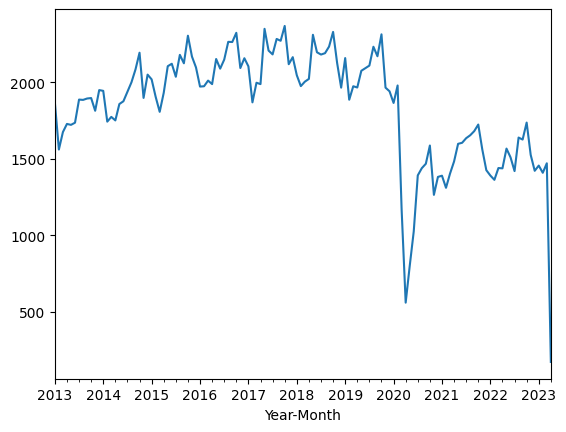

In [31]:
import matplotlib.pyplot as plt

traffic_data['Year-Month'] = traffic_data.Datetime.dt.to_period("M")
traffic_data.groupby(traffic_data['Year-Month'])["offense_code"].count().plot()

<Axes: xlabel='Datetime'>

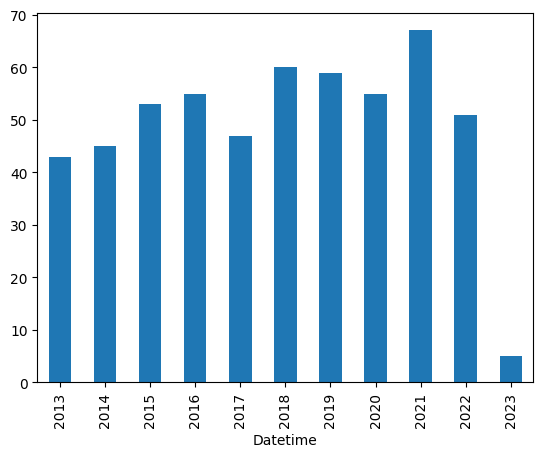

In [33]:
fatal.groupby(fatal.Datetime.dt.year)["offense_code"].count().plot(kind='bar')

Despite traffic accidents decreasing during the pandemic, fatalities seems unchanged